# Comparing Random Forest with Logistic Regression for Predicting Class-Imbalanced Bank marketing Data 

In the project, we use the Bank Marketing Data Set in UCI Machine Learning Repository. Then, we compare the predictive performances of logistic regression models and random forests model. Finally, we summarise that which clients are more likely to subscribe the bank term deposit. Also, we indicate which factors can attract the clients to subscribe the bank term deposit.

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

#### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y). For comparing random forest with logistic regression, we use bank-additional-full.csv.

## Attribute Information:

### Input variables:
#### Client’s  personal  informatio:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### Campaign activities:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### Social and economic environment data:
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)
#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## 1. Load dataset

In [861]:
#from library impport necessary function
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import accuracy_score, auc, roc_curve, f1_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

In [862]:
bank_additional_full = pd.read_csv('./bank-additional/bank-additional/bank-additional-full.csv',sep=';')

In [863]:
bank_additional_full.shape

(41188, 21)

In [864]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Data preprocessing

In [865]:
# Check the number of rows containing null
print("The number of rows containing null:{}".format(bank_additional_full[bank_additional_full.isnull().T.any()].shape[0]))

The number of rows containing null:0


In [866]:
#delete duplicate raws
print("The number of duplicated rows:{}".format(bank_additional_full[bank_additional_full.duplicated()].shape[0]))
bank_additional_full.drop_duplicates(inplace = True)

The number of duplicated rows:12


Accoring to the attribute information, 'duration' variable: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Therefore, we will drop this variable.

In [867]:
bank_additional_full.drop(['duration'],axis=1,inplace=True)
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Visualise features

no     36537
yes     4639
Name: y, dtype: int64
The ratio of subscribed (‘no’) bank term deposit and not ('yes') subscribed in the data is roughly 7.876050873032981.


<AxesSubplot:xlabel='y', ylabel='count'>

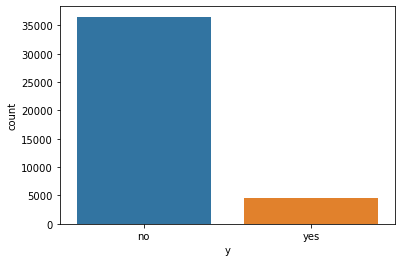

In [868]:
print(bank_additional_full.y.value_counts())
count = bank_additional_full.y.value_counts()
print ("The ratio of subscribed (‘no’) bank term deposit and not ('yes') subscribed in the data is roughly {}.".format(count.no / count.yes))

sns.countplot(x='y', data=bank_additional_full)

It is obvious that the data set is highly imbalanced.

#### Visualise categorical features

In [869]:
def visualise_categorical_variables(variables):
    fig, axes = plt.subplots(1, 2, figsize= (15,5))

    #plot the distibution of the varaible
    count_plt = sns.countplot(x=variables, data=bank_additional_full.sort_values(by=variables), ax=axes[0])
    count_plt.set_xticklabels(count_plt.get_xticklabels(), rotation=60)
    count_plt.set_title('Distribution of {}'.format(variables))
    
    #plot the distibution of the varaible on the the decision of subscribing bank term deposit
    group = bank_additional_full.groupby(['y', variables])[variables].count()
    group = group.unstack()
    group.replace(np.NaN,0,inplace=True)
    group = group.div(group.sum(axis=1), axis=0)
    group = group.loc['yes'] - group.loc['no']
    group = group.sort_index()
    
    pl = sns.barplot(x=group.values,y=group.index, ax=axes[1])
    pl.set_title('The relationship between the decision of subscribing bank term deposit and the categories of {} '.format(variables))
    pl.set_ylabel(variables)
    pl.set_xlabel('Decision')
    
    plt.tight_layout()

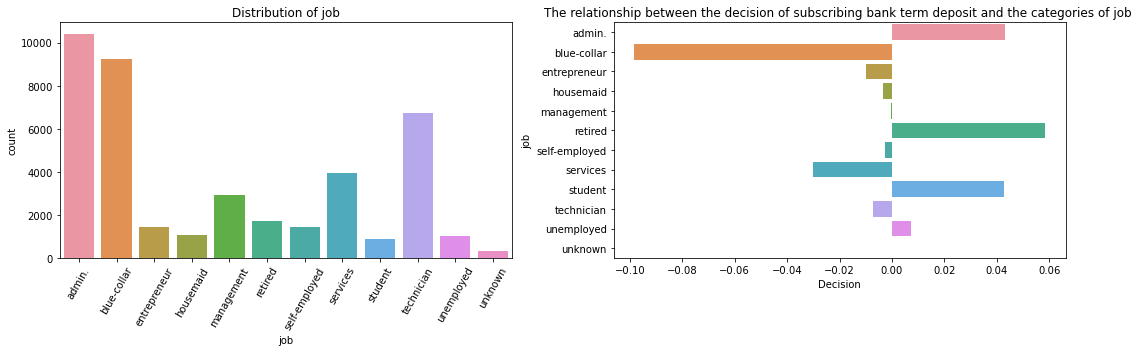

In [870]:
visualise_categorical_variables('job')

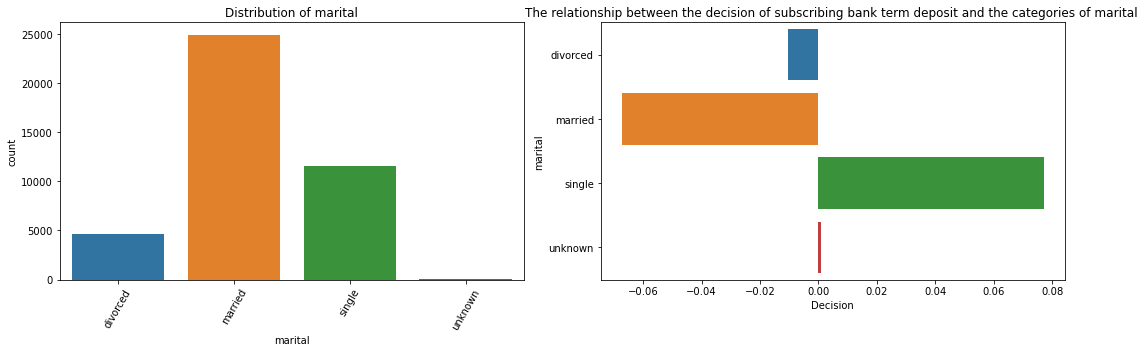

In [871]:
visualise_categorical_variables('marital')

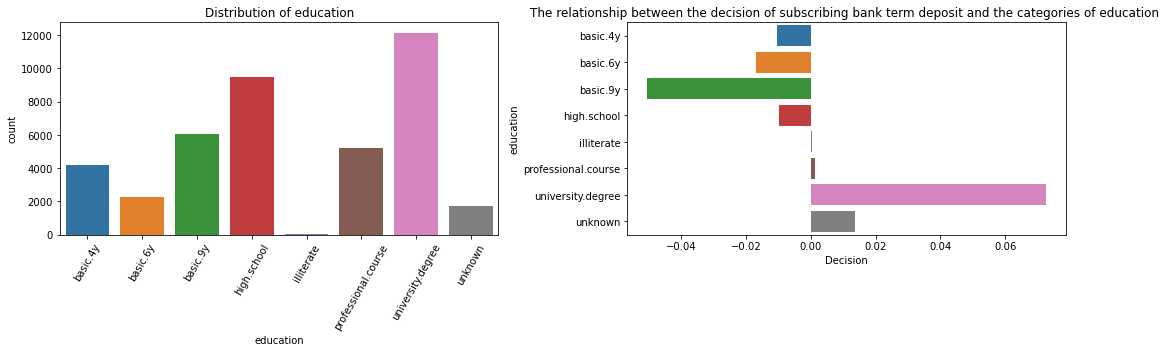

In [872]:
visualise_categorical_variables('education')

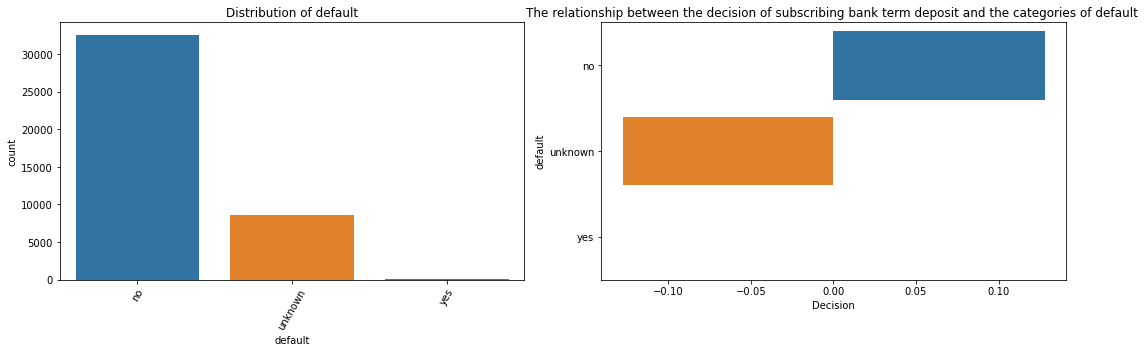

In [873]:
visualise_categorical_variables('default')

It is obvious that the 'default' variable is skewed to 'no'. Also, there are so many 'unknown' variables. Therefore, the 'default' variable
is not representative. We will drop this 'varaible'. 

In [874]:
bank_additional_full.drop(['default'],axis=1,inplace=True)
bank_additional_full.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


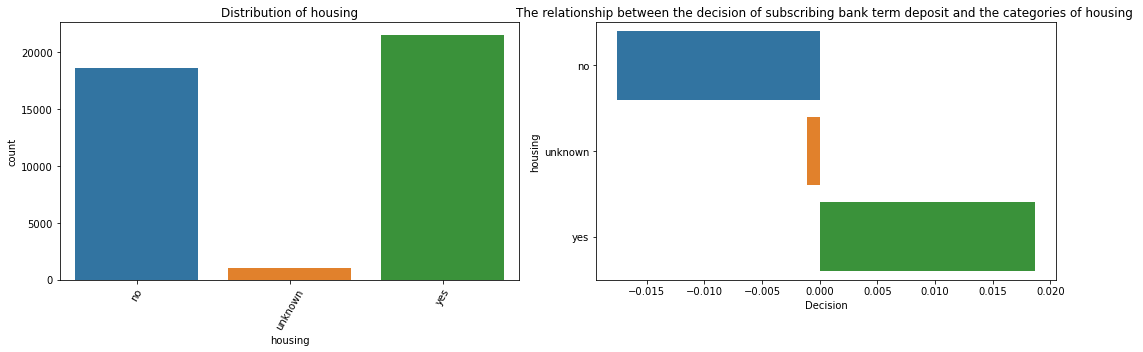

In [875]:
visualise_categorical_variables('housing')

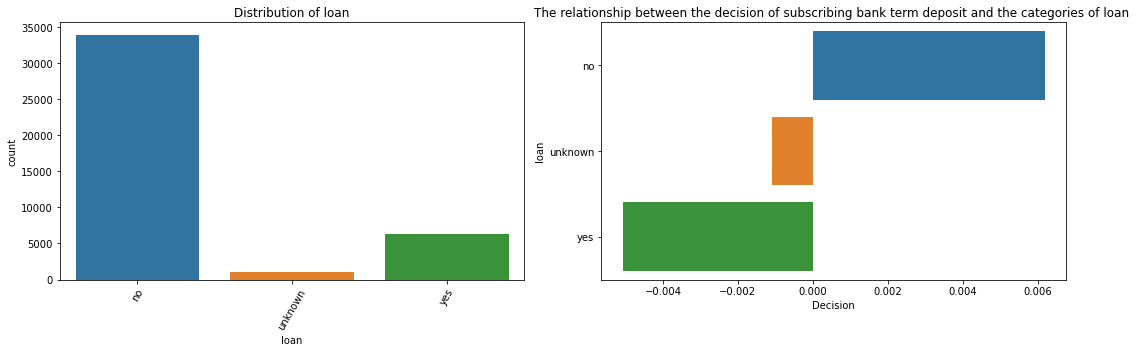

In [876]:
visualise_categorical_variables('loan')

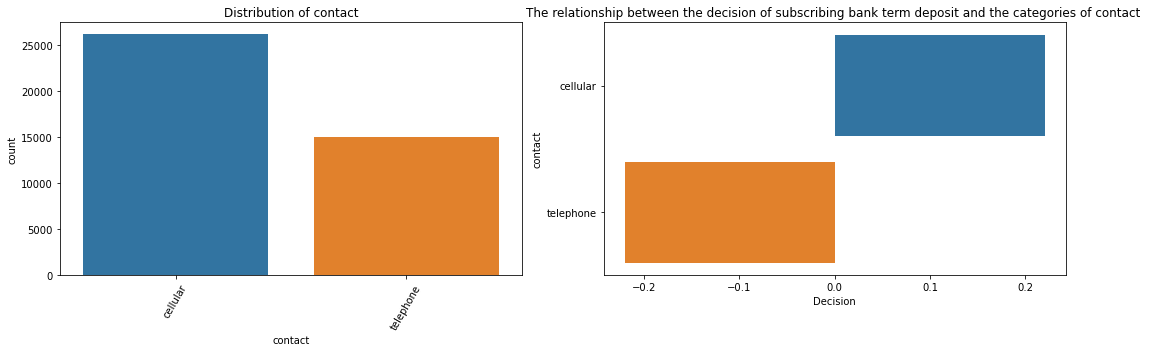

In [877]:
visualise_categorical_variables('contact')

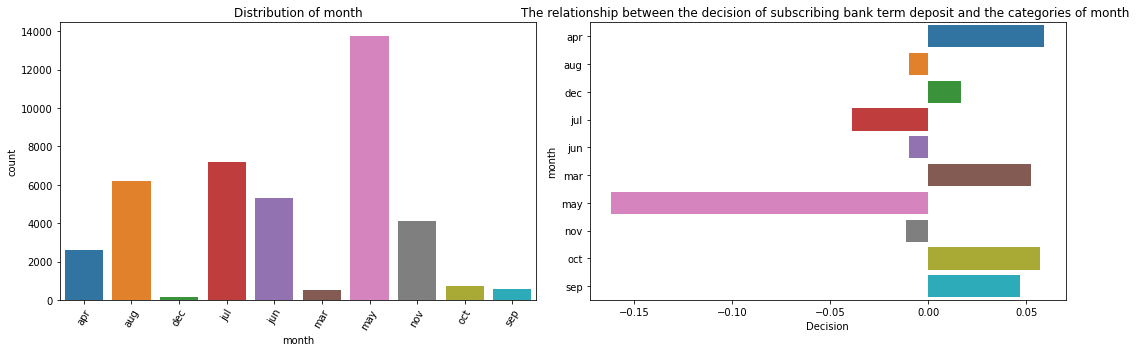

In [878]:
visualise_categorical_variables('month')

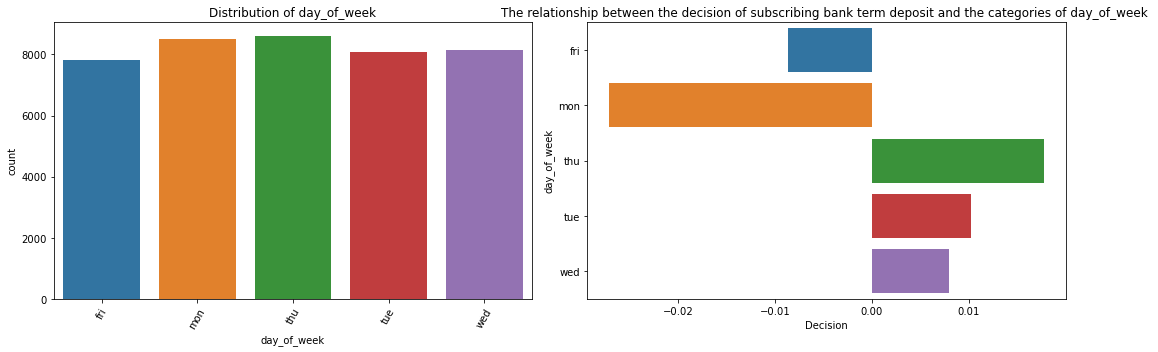

In [879]:
visualise_categorical_variables('day_of_week')

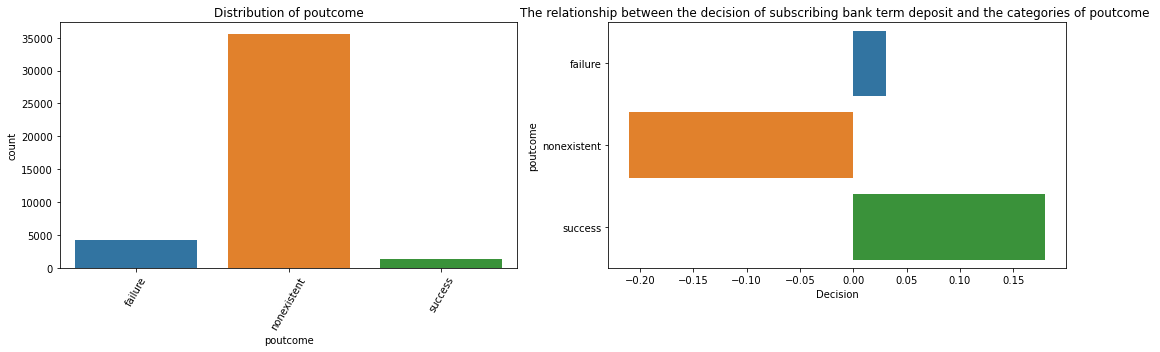

In [880]:
visualise_categorical_variables('poutcome')

The positive value in the relationship figures means that this category of clients is more likely to subsribe the bank term deposit.The negative value in the relationship figures means that this category of clients is less likely to subsribe the bank term deposit.

It is obvious that the dependent variable, 'y' depends all the categorical varibles. Also, there is a 'unknown' category in education’, ‘job’, ‘housing’, ‘loan’, ‘default’, and ‘marital’. However, 'unknown' variable can not help us use predictable model to determine which clients are more likely to subscribe a term deposit.

Therefore, we will try to fill the unknown values.

#### Filling unknown values

In [763]:
# replace 'unknown' as np.NaN
bank_additional_full.replace('unknown',np.NaN,inplace=True)

# Determine which columns containing missing values
bank_additional_full.isnull().T.any(axis=1)

age               False
job                True
marital            True
education          True
housing            True
loan               True
contact           False
month             False
day_of_week       False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [764]:
# use imputer to fill the missing values based on the most frequenct category in the column
missing_col = ['job','marital','education','housing','loan']
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for i in missing_col:
    bank_additional_full[i] = imp.fit_transform(bank_additional_full[i].values.reshape(-1,1))
    
bank_additional_full.isnull().T.any(axis=1)

age               False
job               False
marital           False
education         False
housing           False
loan              False
contact           False
month             False
day_of_week       False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

#### Visualise the numeric variable

In [765]:
def visualise_numeric_variables(variables):
    pl = sns.boxplot(x = bank_additional_full.y,y = variables,data = bank_additional_full)

    pl.set_title('Boxplot grouped by the decision of subscribing bank term deposit \n  {} '.format(variables))
    pl.set_ylabel(variables)
    pl.set_xlabel('Decision')
    plt.tight_layout()
    plt.tight_layout()

#### Visualise the distriution of each numeric variable

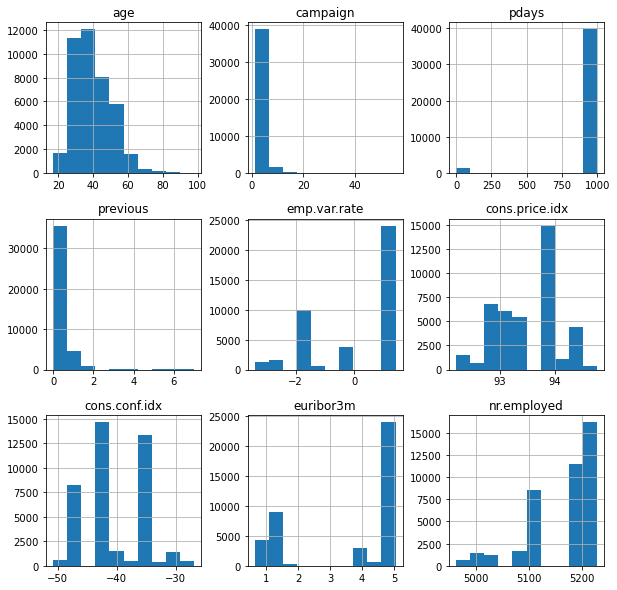

In [766]:
numeric_variables = ["age","campaign", "pdays", "previous","emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
bank_additional_full.hist(column=numeric_variables,figsize=(10,10))
plt.show()

It is obvious that the numeric variables are not uniformly distributed. Therefore, we will standardize them. In addition, the 'pdays' variables is distributed discretely. We will convert the 'pdays' to categorical variable. 

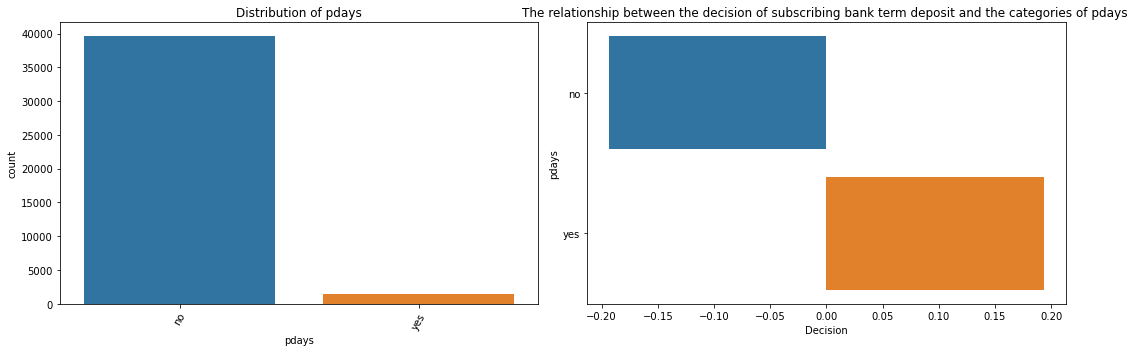

In [881]:
# 999 means client was not previously contacted. Therefore, we use 'no' representing 999. 'yes' representing others

bank_additional_full.loc[bank_additional_full['pdays'] != 999, 'pdays'] = 'yes'
bank_additional_full.loc[bank_additional_full['pdays'] == 999, 'pdays'] = 'no'
bank_additional_full.pdays.astype("category")

visualise_categorical_variables('pdays')

It is obvious that the ('pdays' < 30) variables have the same influences on the decision. Also, the ('pdays' == 999) variables have the same influences on the decision

#### Visualise the numeric varaibles grouped by the decision of subscribing bank term deposit

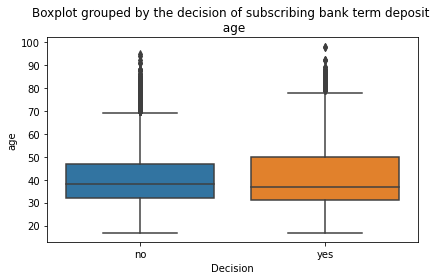

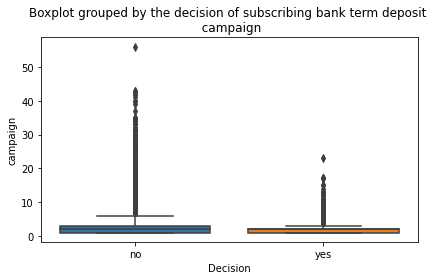

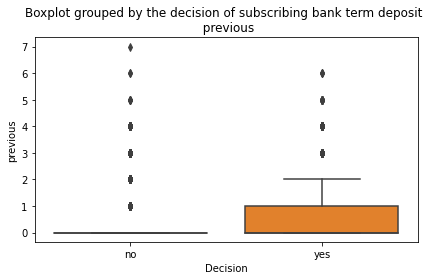

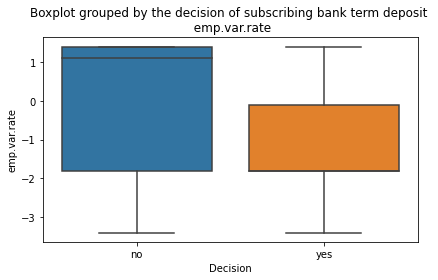

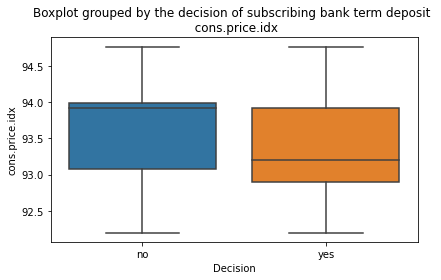

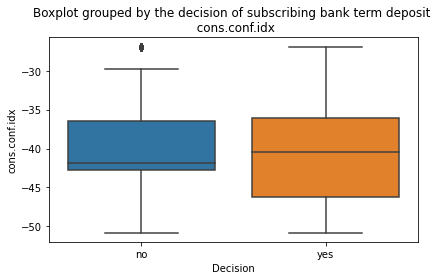

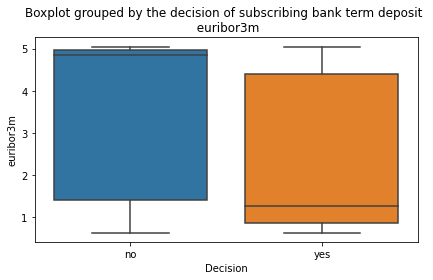

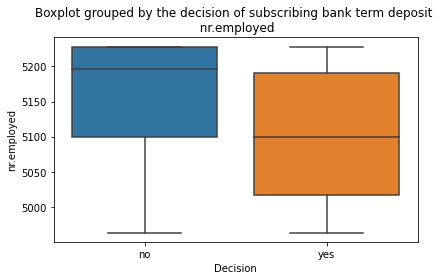

In [768]:
numeric_variables.remove('pdays')
for i in numeric_variables:
    plt.figure()
    visualise_numeric_variables(i)    

Under different dicisions, all the numeric variables has the different distributions. 

#### Show the correlation between numeric variables

In [769]:
bank_additional_full.corr()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.004622,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
campaign,0.004622,1.000000,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
previous,0.024379,-0.079182,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,0.150786,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.127826,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.013657,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,0.135169,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,0.144129,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


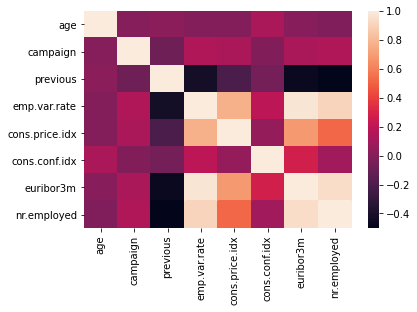

In [770]:
# Visualise the correlation between numeric variables
sns.heatmap(bank_additional_full.corr())
plt.show()

It is obvious that all the numeric variables affect the dependent variavles, 'y'. However, some numerics features including "euribor3m", "nr.employed" and "emp.var.rate" are highly correlated. 

### 3. Compare random forests and logistic regression

In [583]:
# Indicate the columns containing categorical varaibles
categorical_cols = ['job','marital','education','loan','contact','month','poutcome',"day_of_week" ,"housing"]

#### Standardize the numeric varaibles

In [584]:
df = bank_additional_full.copy()

scaler = StandardScaler()
df[numeric_variables] = scaler.fit_transform(df[numeric_variables])

In [798]:
# Show the numerica varaibles, after standardization
df[numeric_variables].describe()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04,4.117600e+04
mean,1.367406e-15,2.775133e-14,-6.938219e-14,-3.072308e-13,2.035173e-13,5.407675e-14,1.440142e-14,2.016538e-14
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.209460e+00,-5.659633e-01,-3.495514e-01,-2.216565e+00,-2.374990e+00,-2.225059e+00,-1.722363e+00,-2.815689e+00
25%,-7.699975e-01,-5.659633e-01,-3.495514e-01,-1.198017e+00,-8.650522e-01,-4.747688e-01,-1.313003e+00,-9.402687e-01
50%,-1.942124e-01,-2.049895e-01,-3.495514e-01,6.481012e-01,2.993617e-01,-2.802921e-01,7.124626e-01,3.316951e-01
75%,6.694654e-01,1.559842e-01,-3.495514e-01,8.390789e-01,7.226279e-01,8.865681e-01,7.724252e-01,8.451864e-01
max,5.563639e+00,1.928759e+01,1.379305e+01,8.390789e-01,2.058076e+00,2.939378e+00,8.208565e-01,8.451864e-01


#### Label Encoder

In [586]:
# Label the dependent varaible
df['y'] = df['y'].apply(lambda x: 1 if x=="yes" else 0)

#### Label Encoder for categorical varaibles
cat_cols = ['job','marital','education','loan','contact','month','poutcome',"day_of_week" ,"housing",'pdays' ]
le = preprocessing.LabelEncoder()

for col in cat_cols:
    #print(col)
    df[col] = le.fit_transform(df[col])

#### SMOTE oversampling

In [587]:
# Use SMOTE algorithm to oversample the minority class. Then, the ratio between majority class and minority class will be 3 : 1.
X = df.drop('y',axis=1)
y = df['y']

smote = SMOTE(sampling_strategy = 0.25)
X, y = smote.fit_sample(X, y)

0    36537
1     9134
Name: y, dtype: int64
The ratio of subscribed (‘no’) bank term deposit and not ('yes') subscribed in the data is roughly 4.000109481059777.


<AxesSubplot:xlabel='y', ylabel='count'>

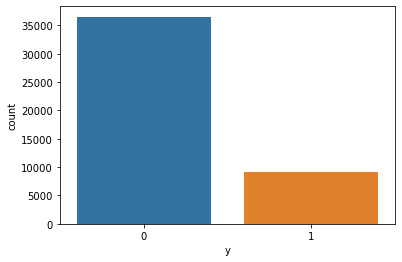

In [588]:
# Visualise the distribution of dependent variables after SMOTE oversampling

print(y.value_counts())
smote_count = y.value_counts()
print ("The ratio of subscribed (‘no’) bank term deposit and not ('yes') subscribed in the data is roughly {}.".format(smote_count.iloc[0] / smote_count.iloc[1]))

sns.countplot(x=y)

#### Evaluate logistic regression model and random forests model

In [589]:
# Indicate the name of models
model_list = ['lr','lr1','lr2','rf']

#### 1. Search hyper parameters of Logistic regression model

In [590]:
def search_hyperparameter(model_name):
    
    if model_name == 'lr1': # C represent the strenth of Inverse of regularization strength
        model =  LogisticRegression( solver='saga', penalty='l1', max_iter=500)
        parameters = {
                        'C': np.linspace(1, 10, 10)
                      }
    elif model_name == 'lr2':
        model =  LogisticRegression(solver="newton-cg",penalty='l2', max_iter=500)
        parameters = {
                        'C': np.linspace(1, 10, 10)
                      }
    elif model_name == 'rf':
        model = RandomForestClassifier(criterion='gini', class_weight = 'balanced', oob_score = True, random_state = 0)
        parameters = {
                        'n_estimators':[10, 50, 100, 200, 500], 
                        'max_depth':[5, 10, 15, 20]
                      }
    
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 0) #set random_state to be 0
    clf = GridSearchCV(model,parameters,scoring='roc_auc',n_jobs=-1,cv=kf)
    clf.fit(X, y)
    print(model_name)
    print(clf.best_params_)

In [591]:
for i in model_list:
    if i != 'lr':
        search_hyperparameter(i)

lr1
{'C': 10.0}
lr2
{'C': 10.0}
rf
{'max_depth': 20, 'n_estimators': 500}


#### 2. Compare the performances of models

In [592]:
def model_score(model):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 0) #set random_state to be 0
    
   # Predict the probabilities with a ten-fold cross validationn
    y_pred = cross_val_predict(model, X, y, cv=kf, method="predict_proba")
    
    # Compute the False Positive Rate and True Positive Rate
    fpr, tpr, _ = roc_curve(y, y_pred[:,1])

    # Compute the area under the fpt-tpf curve
    auc_score = auc(fpr, tpr)
    
    f1 = []
    ratio = np.linspace(0.2, 0.8, 4)
    
    for i in ratio:
        x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = i, random_state=0)
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        f1.append(f1_score(predict, y_test))
    
    return fpr, tpr, auc_score, f1

In [593]:
# Initialise our models
lr_uncorrected = LogisticRegression(solver="newton-cg", penalty='none', max_iter=500)
lr_L1 = LogisticRegression(solver="saga", penalty='l1', C =10.0, max_iter=500)
lr_L2 = LogisticRegression(solver="newton-cg", penalty='l2', C =10.0, max_iter=500)
rf = RandomForestClassifier(criterion='gini', n_estimators=500, max_depth=20, class_weight = 'balanced', random_state=0)

In [596]:
# Get the fpr, tpr, auc_scroe, f1_score of each model
fpr_lr, tpr_lr, auc_score_lr, f1_lr = model_score(lr_uncorrected)
fpr_lr_L1, tpr_lr_L1, auc_score_lr_L1, f1_lr_L1 = model_score(lr_L1)
fpr_lr_L2, tpr_lr_L2, auc_score_lr_L2, f1_lr_L2 = model_score(lr_L2)
fpr_rf, tpr_rf, auc_score_rf, f1_rf = model_score(rf)

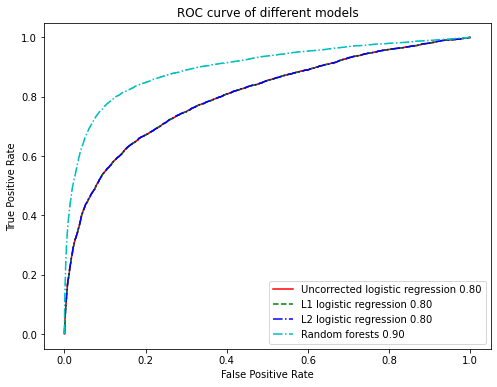

In [597]:
##Plot ROC of all classifiers
plt.figure(figsize = (8, 6))
plt.plot(fpr_lr, tpr_lr, 'r-', label='Uncorrected logistic regression {:.2f}'.format(auc_score_lr))
plt.plot(fpr_lr_L1, tpr_lr_L1, 'g--', label='L1 logistic regression {:.2f}'.format(auc_score_lr_L1))
plt.plot(fpr_lr_L2, tpr_lr_L2, 'b-.', label='L2 logistic regression {:.2f}'.format(auc_score_lr_L2))
plt.plot(fpr_rf, tpr_rf, 'c-.', label='Random forests {:.2f}'.format(auc_score_rf))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve of different models")
plt.legend(loc = 'lower right')
plt.savefig('ROC curve of different models')

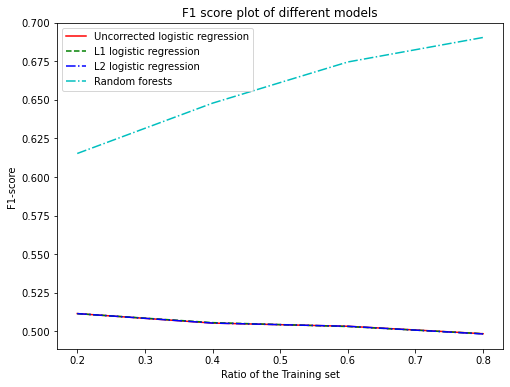

In [850]:
#plot F1 score 
plt.figure(figsize = (8, 6))
x = np.linspace(0.2, 0.8, 4)

plt.plot(x, f1_lr, 'r-', label='Uncorrected logistic regression')
plt.plot(x, f1_lr_L1, 'g--', label='L1 logistic regression')
plt.plot(x, f1_lr_L2, 'b-.', label='L2 logistic regression')
plt.plot(x, f1_rf, 'c-.', label='Random forests')

plt.xlabel("Ratio of the Training set")
plt.ylabel("F1-score")
plt.title("F1 score plot of different models")
plt.legend(loc = 'best')

plt.savefig("F1 score plot of different models")

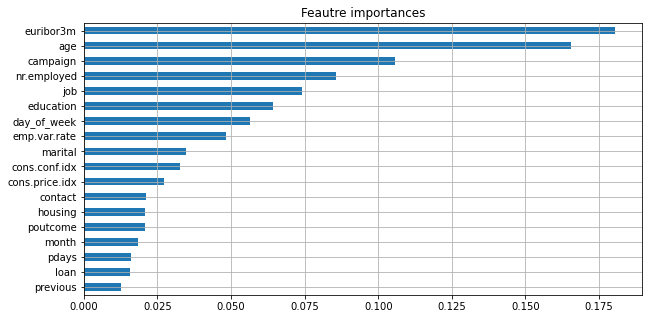

In [599]:
# Feature Imprtances
clf = RandomForestClassifier(criterion='gini', n_estimators=100, class_weight='balanced')
clf.fit(X, y)

importances = pd.Series(clf.feature_importances_,index=X.columns)
importances = importances.sort_values()
ax = importances.plot.barh(figsize = (10,5))
ax.set_title('Feautre importances')
ax.grid()

plt.savefig("Feature importances")

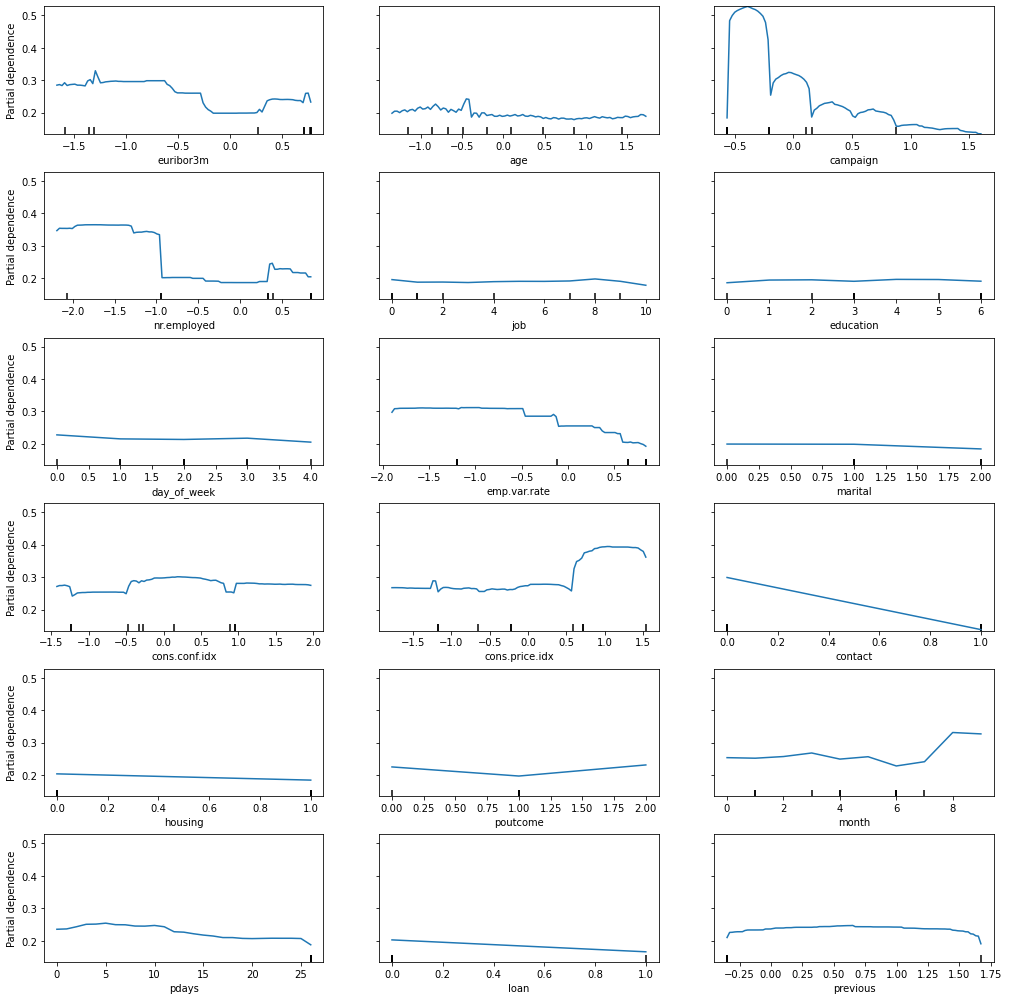

In [600]:
# Plot partial dependence plot
fig, ax = plt.subplots(figsize=(14, 14))
plot_partial_dependence(clf, X, importances.sort_values(ascending =False).index, n_jobs=-1,ax=ax) 
fig.subplots_adjust(hspace=0.3)
fig.tight_layout()

plt.savefig("Partial dependence plot")

### Discussion
According to the ROC curve and AUC score, it is clear that the random forests outperform the logistic models. The AUC score of random forests is 0.90. However, the AUC scores of uncorrected, L1 and L2 logistic regression models are all 0.80.

The F1 score plot can also indicate that random forests can predict the decision of subscribing the bank term deposits more acurately than the logisitic regression models.

The feartures including 'euribor3m', 'age', 'campaign', 'nr.employed', 'job' and 'education' are the most important. The 'euribor3m' is the strongest predictor. According to partial dependence plot, the lower euribor 3 month rate - daily indicator can attract clients to subscribe the bank term deposits. 

Then, the age can also be a strong predictor. According to the distribution of age and the partial dependence plot, the elderly will be more likely to subscribe the bank term depoists.

The 'campaign' feature indicates that relatively low number of contacts performed during this campaign and for this client can increase the possibility of subscribing the bank term depoists.

'nr.employed' is the number of employees - quarterly indicator. Therefore, low number of employees can attract clients to subscribe the bank term deposits.

The 'job' and 'education' are the categorical variables. According to the distribution of the two variables, if the client's job is retired, the client is more likely to subscribe the bank term deposits. Also, if a client has a university degree, the client is more likely to subscribe the bank term deposits.

According to the partial dependence plot, the categorical variables exhibit significant nonlinear relationships, so the changes of these categorical varaibles would not be captured by a linear logistic model. Also, the numeric variables except 'contact' present significant nonlinear relationships. Therefore, the logistic regression model provide lower AUC score and F1 score.
